# Introdução à Econometria - Parte I

Econometria é uma disciplina que combina economia, matemática e estatística para analisar dados econômicos. O objetivo principal da econometria é transformar dados teóricos em modelos quantitativos que possam ser testados empiricamente. 

## Principais Conceitos

- **Modelos Econométricos**: São representações matemáticas de relações econômicas. Eles ajudam a prever e explicar comportamentos econômicos.
- **Regressão Linear**: Uma técnica comum usada para estimar a relação entre uma variável dependente e uma ou mais variáveis independentes.
- **Teste de Hipóteses**: Utilizado para determinar se os resultados obtidos em uma amostra podem ser generalizados para a população inteira.

## Aplicações

A econometria é amplamente utilizada em diversas áreas, como:

- **Previsão**: Prever tendências futuras, como crescimento do PIB ou taxas de desemprego.
- **Avaliação**: Analisar o impacto de políticas governamentais, como mudanças na taxa de juros ou programas de assistência social.
- **Análises**: Estudar o comportamento dos consumidores e a dinâmica dos mercados financeiros.

Através da econometria, economistas e analistas podem tomar decisões mais informadas e baseadas em dados concretos.

### Bibliotecas Principais

In [1]:
%pip install pandas matplotlib numpy seaborn statsmodels requests openpyxl pycountry fuzzywuzzy gdown

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem Econométrica
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Dados do Wooldridge
import wooldridge as woo

# Requisições HTTP
import requests
import gdown
import io

# Manipulação de palavras
from fuzzywuzzy import process
import pycountry


c:\Users\guian\Indicium\treinamentos\.venv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# O que é Econometria?

Econometria é uma disciplina que combina economia, matemática e estatística para analisar dados econômicos. O objetivo principal da econometria é transformar dados teóricos em modelos quantitativos que possam ser testados empiricamente.

## Principais Conceitos para aplicar a Econometria em Python

- **Modelos Econométricos**: São representações matemáticas de relações econômicas.
Exemplo de modelo econométrico: $Y = \beta_0 + \beta_1X + \epsilon$

- **Regressão Linear**: Uma técnica comum usada para estimar a relação entre uma variável dependente e uma ou mais variáveis independentes. Essa relação é vista no Beta, que é o coeficiente da variável independente.

- **P-Value**: É um valor que ajuda a determinar a significância estatística de uma variável independente em um modelo de regressão. Quanto menor o p-valor, mais significativa é a variável.

- **R²**: É uma medida de quão bem o modelo se ajusta aos dados. É quase como uma porcentagem que mostra o quanto a variável dependente é explicada pelas variáveis independentes.

- **Tamaho da Amostra**: É a quantidade de observações disponíveis para análise. Quanto maior a amostra, mais confiável é o resultado.

- **Resíduos**: São as diferenças entre os valores observados e os valores previstos pelo modelo. Eles são importantes para verificar a qualidade do ajuste do modelo.

- **Desvio Padrão**: É uma medida de dispersão dos dados em torno da média. Quanto maior o desvio padrão, mais dispersos estão os dados.

### Cross-Section Data

In [3]:
# URLs dos arquivos no Google Drive
url_rle = 'https://drive.google.com/uc?id=1eyl5SUhAQbvFTlScTtTLQdyoHmqj80zx'
url_gpdph = 'https://drive.google.com/uc?id=1vXudE9U22700oKk5xnpJdi5coPUizuKG'
url_inv = 'https://drive.google.com/uc?id=1tJ2NSvt_I7kOWAhrwodxKa3J_N_dsy_l' 

# Caminhos dos arquivos
path_rle = 'data/rle.csv'
path_gpdph = 'data/gpdph.csv'
path_inv = 'data/inv.xlsx'

# Baixando os arquivos
gdown.download(url_rle, path_rle, quiet=False)
gdown.download(url_gpdph, path_gpdph, quiet=False)
gdown.download(url_inv, path_inv, quiet=False)

# Lendo os arquivos com o pandas
df_rle = pd.read_csv(path_rle)
df_gpdph = pd.read_csv(path_gpdph)
df_inv = pd.read_excel(path_inv)

Downloading...
From: https://drive.google.com/uc?id=1eyl5SUhAQbvFTlScTtTLQdyoHmqj80zx
To: c:\Users\guian\Indicium\treinamentos\econometria-em-python\data\rle.csv
100%|██████████| 442k/442k [00:00<00:00, 1.88MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vXudE9U22700oKk5xnpJdi5coPUizuKG
To: c:\Users\guian\Indicium\treinamentos\econometria-em-python\data\gpdph.csv
100%|██████████| 95.8k/95.8k [00:00<00:00, 811kB/s]
Downloading...
From: https://drive.google.com/uc?id=1tJ2NSvt_I7kOWAhrwodxKa3J_N_dsy_l
To: c:\Users\guian\Indicium\treinamentos\econometria-em-python\data\inv.xlsx
100%|██████████| 162k/162k [00:00<00:00, 923kB/s]


In [4]:
df_rle

,Id,Name,Short Name,ISO Code,Index Year,Overall Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,1,Afghanistan,Afghanistan,AF,2023,NaN,5.8,5.4,12.7,NaN,NaN,NaN,34.6,45.1,NaN,NaN,NaN,NaN
1,2,Albania,Albania,AL,2023,65.3,55.9,49.2,35.5,89.1,71.0,58.2,70.7,49.7,81.3,82.8,70.0,70.0
2,3,Algeria,Algeria,DZ,2023,43.2,27.8,29.5,28.4,71.9,50.7,12.1,53.6,51.4,75.1,57.5,30.0,30.0
3,4,Angola,Angola,AO,2023,53.0,41.1,24.8,22.9,86.5,86.9,85.1,41.6,53.9,58.9,64.8,30.0,40.0
4,5,Argentina,Argentina,AR,2023,51.0,34.6,56.8,42.8,66.9,53.9,33.6,55.5,55.1,36.5,61.2,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,179,Venezuela,Venezuela,VE,1995,59.8,50.0,NaN,10.0,80.0,76.1,NaN,85.0,NaN,52.0,65.0,50.0,70.0
5335,180,Vietnam,Vietnam,VN,1995,41.7,10.0,NaN,10.0,68.8,87.1,NaN,40.0,NaN,55.2,44.6,30.0,30.0
5336,181,Yemen,Yemen,YE,1995,49.8,30.0,NaN,10.0,78.2,73.4,NaN,70.0,NaN,41.8,45.0,70.0,30.0
5337,182,Zambia,Zambia,ZM,1995,55.1,50.0,NaN,30.0,72.4,74.8,NaN,55.0,NaN,12.2,61.2,70.0,70.0


In [5]:
df_inv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.816759,24.253731,24.218215,23.456403,23.952357,20.993810,21.428638,20.750793,19.294592,NaN
2,Afghanistan,AFG,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.120568,19.154326,18.951842,19.064122,17.581707,19.988446,23.153365,24.015844,27.448714,NaN
4,Angola,AGO,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.158497,27.478813,28.209604,26.213214,23.242315,17.194699,16.237556,19.565922,20.232049,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,29.161155,27.504805,28.267085,28.011597,29.959525,31.711269,31.042639,29.706191,32.880725,NaN
262,"Yemen, Rep.",YEM,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,17.474796,16.813354,16.191155,18.212305,19.742389,22.046063,...,18.578712,18.301199,18.008953,17.441504,16.398805,15.944577,15.417722,13.761791,13.091875,NaN
264,Zambia,ZMB,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.035908,31.037455,38.453275,36.420591,38.808619,35.110120,35.756617,29.867508,28.913591,NaN


In [6]:
# Transformando os dados de df_inv em painel

df_inv = df_inv.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
df_inv.dropna(subset=['Value'], inplace=True)

# Ordenando os dados
df_inv = df_inv.sort_values(by=['Country Name', 'Year'])
df_inv

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
7981,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1990,18.336239
8247,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1991,16.985092
8513,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1992,17.590785
8779,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1993,16.622941
9045,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1994,17.052206
...,...,...,...,...,...,...
15427,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2017,9.663851
15693,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2018,11.048306
15959,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2019,10.699352
16225,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2020,10.046081


In [7]:
df_gpdph

,Entity,Code,Year,Productivity: output per hour worked
0,Argentina,ARG,1950,3.727674
1,Argentina,ARG,1951,3.752668
2,Argentina,ARG,1952,3.365233
3,Argentina,ARG,1953,3.522695
4,Argentina,ARG,1954,3.623416
...,...,...,...,...
3487,Vietnam,VNM,2015,4.946606
3488,Vietnam,VNM,2016,5.156925
3489,Vietnam,VNM,2017,5.652919
3490,Vietnam,VNM,2018,5.982665


In [8]:
# Função para encontrar o nome de país mais similar da lista oficial
def find_similar_country_name(name, official_country_names):
    best_match, score = process.extractOne(name, official_country_names)
    if score > 85:  # você pode ajustar este limite de acordo com suas necessidades
        return best_match
    return name  # retorna o nome original se a pontuação for baixa

# Lista de nomes de países corretos (você pode obtê-los de `pycountry`, por exemplo)
official_country_names = [country.name for country in pycountry.countries]

# Corrigindo os nomes de países no DataFrame

df_rle = df_rle.copy()
df_rle['Name'] = df_rle['Name'].apply(lambda name: find_similar_country_name(name, official_country_names))

df_gpdph = df_gpdph.copy()
df_gpdph['Entity'] = df_gpdph['Entity'].apply(lambda name: find_similar_country_name(name, official_country_names))

df_inv = df_inv.copy()
df_inv['Country Name'] = df_inv['Country Name'].apply(lambda name: find_similar_country_name(name, official_country_names))


In [7]:
df_rle.dropna()
df_gpdph.dropna()
df_inv.dropna()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
7981,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1990,18.336239
8247,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1991,16.985092
8513,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1992,17.590785
8779,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1993,16.622941
9045,Africa Eastern and Southern,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1994,17.052206
...,...,...,...,...,...,...
15427,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2017,9.663851
15693,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2018,11.048306
15959,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2019,10.699352
16225,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2020,10.046081


In [98]:
df_rle.rename(columns={'Index Year': 'Year'}, inplace=True)
df_rle

,Id,Country,Short Name,ISO Code,Year,RLE_Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,1,Afghanistan,Afghanistan,AF,2023,NaN,5.8,5.4,12.7,NaN,NaN,NaN,34.6,45.1,NaN,NaN,NaN,NaN
1,2,Albania,Albania,AL,2023,65.3,55.9,49.2,35.5,89.1,71.0,58.2,70.7,49.7,81.3,82.8,70.0,70.0
2,3,Algeria,Algeria,DZ,2023,43.2,27.8,29.5,28.4,71.9,50.7,12.1,53.6,51.4,75.1,57.5,30.0,30.0
3,4,Angola,Angola,AO,2023,53.0,41.1,24.8,22.9,86.5,86.9,85.1,41.6,53.9,58.9,64.8,30.0,40.0
4,5,Argentina,Argentina,AR,2023,51.0,34.6,56.8,42.8,66.9,53.9,33.6,55.5,55.1,36.5,61.2,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,179,"Venezuela, Bolivarian Republic of",Venezuela,VE,1995,59.8,50.0,NaN,10.0,80.0,76.1,NaN,85.0,NaN,52.0,65.0,50.0,70.0
5335,180,Viet Nam,Vietnam,VN,1995,41.7,10.0,NaN,10.0,68.8,87.1,NaN,40.0,NaN,55.2,44.6,30.0,30.0
5336,181,Yemen,Yemen,YE,1995,49.8,30.0,NaN,10.0,78.2,73.4,NaN,70.0,NaN,41.8,45.0,70.0,30.0
5337,182,Zambia,Zambia,ZM,1995,55.1,50.0,NaN,30.0,72.4,74.8,NaN,55.0,NaN,12.2,61.2,70.0,70.0


In [93]:
df_gpdph

,Entity,Code,Year,Productivity: output per hour worked
0,Argentina,ARG,1950,3.727674
1,Argentina,ARG,1951,3.752668
2,Argentina,ARG,1952,3.365233
3,Argentina,ARG,1953,3.522695
4,Argentina,ARG,1954,3.623416
...,...,...,...,...
3487,Viet Nam,VNM,2015,4.946606
3488,Viet Nam,VNM,2016,5.156925
3489,Viet Nam,VNM,2017,5.652919
3490,Viet Nam,VNM,2018,5.982665


In [94]:
df_inv

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
7981,South Georgia and the South Sandwich Islands,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1990,18.336239
8247,South Georgia and the South Sandwich Islands,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1991,16.985092
8513,South Georgia and the South Sandwich Islands,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1992,17.590785
8779,South Georgia and the South Sandwich Islands,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1993,16.622941
9045,South Georgia and the South Sandwich Islands,AFE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,1994,17.052206
...,...,...,...,...,...,...
15427,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2017,9.663851
15693,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2018,11.048306
15959,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2019,10.699352
16225,Zimbabwe,ZWE,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,2020,10.046081


In [95]:
# Renomeia as colunas para uma melhor consistência
df_rle = df_rle.rename(columns={'Name': 'Country', 'Overall Score': 'RLE_Score'})
df_gpdph = df_gpdph.rename(columns={'Entity': 'Country', 'Productivity: output per hour worked': 'Productivity'})
df_inv = df_inv.rename(columns={'Country Name': 'Country', 'Value': 'INV_Score'})

In [100]:
# Une os DataFrames
df_rle['Year'] = df_rle['Year'].astype(str)
df_gpdph['Year'] = df_gpdph['Year'].astype(str)
df_inv['Year'] = df_inv['Year'].astype(str)

df_merged = df_rle.merge(df_gpdph, on=['Country', 'Year'], how='inner')
df_merged = df_merged.merge(df_inv, on=['Country', 'Year'], how='inner')

df_merged.drop_duplicates(subset=['Country', 'ISO Code'])

df_merged = df_merged.reset_index(drop=True)

df_merged

,Id,Country,Short Name,ISO Code,Year,RLE_Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,...,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Code,Productivity,Country Code,Indicator Name,Indicator Code,INV_Score
0,5,Argentina,Argentina,AR,2019,52.2,47.8,44.5,33.5,69.3,...,60.2,70.0,55.0,60.0,ARG,29.425880,ARG,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,14.199046
1,7,Australia,Australia,AU,2019,80.9,79.1,86.5,79.9,62.8,...,86.6,87.6,80.0,90.0,AUS,61.438488,AUS,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,23.326927
2,8,Austria,Austria,AT,2019,72.0,84.2,71.3,77.4,50.5,...,81.5,86.0,90.0,70.0,AUT,65.151680,AUT,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,24.913283
3,12,Bangladesh,Bangladesh,BD,2019,55.6,36.1,34.5,24.4,72.7,...,69.9,63.6,45.0,30.0,BGD,4.791032,BGD,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,32.213730
4,15,Belgium,Belgium,BE,2019,67.3,81.3,61.6,72.5,47.1,...,76.1,86.0,85.0,70.0,BEL,66.265240,BEL,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,24.279769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,174,United Kingdom,UnitedKingdom,GB,1995,77.9,90.0,NaN,90.0,61.3,...,85.0,77.8,70.0,90.0,GBR,36.779327,GBR,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,17.970711
1628,175,United States,UnitedStates,US,1995,76.7,90.0,NaN,90.0,64.8,...,83.8,78.4,70.0,70.0,USA,49.044580,USA,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,20.864599
1629,176,Uruguay,Uruguay,UY,1995,62.5,50.0,NaN,50.0,84.6,...,45.2,63.0,70.0,50.0,URY,16.467913,URY,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,13.526948
1630,179,"Venezuela, Bolivarian Republic of",Venezuela,VE,1995,59.8,50.0,NaN,10.0,80.0,...,52.0,65.0,50.0,70.0,VEN,12.324745,VEN,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,15.948856


In [101]:
df_merged.to_csv('data/df_merged.csv', index=False)

In [3]:
df = pd.read_csv('data/df_merged.csv')
df

,Id,Country,Short Name,ISO Code,Year,RLE_Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,...,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Code,Productivity,Country Code,Indicator Name,Indicator Code,INV_Score
0,5,Argentina,Argentina,AR,2019,52.2,47.8,44.5,33.5,69.3,...,60.2,70.0,55.0,60.0,ARG,29.425880,ARG,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,14.199046
1,7,Australia,Australia,AU,2019,80.9,79.1,86.5,79.9,62.8,...,86.6,87.6,80.0,90.0,AUS,61.438488,AUS,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,23.326927
2,8,Austria,Austria,AT,2019,72.0,84.2,71.3,77.4,50.5,...,81.5,86.0,90.0,70.0,AUT,65.151680,AUT,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,24.913283
3,12,Bangladesh,Bangladesh,BD,2019,55.6,36.1,34.5,24.4,72.7,...,69.9,63.6,45.0,30.0,BGD,4.791032,BGD,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,32.213730
4,15,Belgium,Belgium,BE,2019,67.3,81.3,61.6,72.5,47.1,...,76.1,86.0,85.0,70.0,BEL,66.265240,BEL,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,24.279769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,174,United Kingdom,UnitedKingdom,GB,1995,77.9,90.0,NaN,90.0,61.3,...,85.0,77.8,70.0,90.0,GBR,36.779327,GBR,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,17.970711
1628,175,United States,UnitedStates,US,1995,76.7,90.0,NaN,90.0,64.8,...,83.8,78.4,70.0,70.0,USA,49.044580,USA,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,20.864599
1629,176,Uruguay,Uruguay,UY,1995,62.5,50.0,NaN,50.0,84.6,...,45.2,63.0,70.0,50.0,URY,16.467913,URY,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,13.526948
1630,179,"Venezuela, Bolivarian Republic of",Venezuela,VE,1995,59.8,50.0,NaN,10.0,80.0,...,52.0,65.0,50.0,70.0,VEN,12.324745,VEN,Gross fixed capital formation (% of GDP),NE.GDI.FTOT.ZS,15.948856


### Juntando tudo

In [5]:
df.columns

Index(['Id', 'Country', 'Short Name', 'ISO Code', 'Year', 'RLE_Score',
       'Property Rights', 'Judicial Effectiveness', 'Government Integrity',
       'Tax Burden', 'Government Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom', 'Code',
       'Productivity', 'Country Code', 'Indicator Name', 'Indicator Code',
       'INV_Score'],
      dtype='object')

In [6]:
df = df.drop(columns=['Id', 'Short Name', 'ISO Code', 'Code', 'Country Code', 'Indicator Name', 'Indicator Code'])
df.dropna(inplace=True)

# substitiondo os espaços por _ em todas os nomes de colunas
df.columns = df.columns.str.replace(' ', '_')

df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Cross Section

Cross Section é um tipo de dado que é coletado em um único ponto no tempo. Por exemplo, uma pesquisa de opinião realizada em um determinado dia. Esse tipo de dado é comum em estudos de mercado, pesquisas de satisfação e análises de desempenho.

O Cross Section Data é frequentemente utilizado em análises econométricas para estudar a relação entre variáveis independentes e dependentes em um determinado momento. Por exemplo, podemos analisar a relação entre salário e nível de educação em uma amostra de indivíduos em um determinado ano.



In [7]:
## Mostrando dados de 2019
df[df['Year'] == '2019']

,Country,Year,RLE_Score,Property_Rights,Judicial_Effectiveness,Government_Integrity,Tax_Burden,Government_Spending,Fiscal_Health,Business_Freedom,Labor_Freedom,Monetary_Freedom,Trade_Freedom,Investment_Freedom,Financial_Freedom,Productivity,INV_Score
0,Argentina,2019-01-01,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,29.425880,14.199046
1,Australia,2019-01-01,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,86.6,87.6,80.0,90.0,61.438488,23.326927
2,Austria,2019-01-01,72.0,84.2,71.3,77.4,50.5,24.5,85.5,74.9,68.7,81.5,86.0,90.0,70.0,65.151680,24.913283
3,Bangladesh,2019-01-01,55.6,36.1,34.5,24.4,72.7,94.5,77.6,50.9,68.2,69.9,63.6,45.0,30.0,4.791032,32.213730
4,Belgium,2019-01-01,67.3,81.3,61.6,72.5,47.1,15.2,73.4,78.1,61.0,76.1,86.0,85.0,70.0,66.265240,24.279769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Thailand,2019-01-01,68.3,53.7,45.9,36.4,81.3,85.8,96.5,82.5,63.9,75.2,83.0,55.0,60.0,15.167234,22.567377
62,United Kingdom,2019-01-01,78.9,92.3,85.9,83.8,64.7,48.2,68.6,92.9,73.5,81.2,86.0,90.0,80.0,54.348810,17.852854
63,United States,2019-01-01,76.8,79.3,78.6,77.4,75.1,57.1,53.1,83.8,89.4,76.6,86.6,85.0,80.0,73.700400,20.978794
64,Uruguay,2019-01-01,68.6,68.3,58.9,69.2,77.2,67.5,69.9,74.3,71.9,72.9,78.6,85.0,30.0,28.378277,15.404333


In [8]:
df_panel = df.copy()
df_panel.set_index(['Country', 'Year'], inplace=True)
df_panel

,,RLE_Score,Property_Rights,Judicial_Effectiveness,Government_Integrity,Tax_Burden,Government_Spending,Fiscal_Health,Business_Freedom,Labor_Freedom,Monetary_Freedom,Trade_Freedom,Investment_Freedom,Financial_Freedom,Productivity,INV_Score
Country,Year,,,,,,,,,,,,,,,
Argentina,2019-01-01,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,29.425880,14.199046
Australia,2019-01-01,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,86.6,87.6,80.0,90.0,61.438488,23.326927
Austria,2019-01-01,72.0,84.2,71.3,77.4,50.5,24.5,85.5,74.9,68.7,81.5,86.0,90.0,70.0,65.151680,24.913283
Bangladesh,2019-01-01,55.6,36.1,34.5,24.4,72.7,94.5,77.6,50.9,68.2,69.9,63.6,45.0,30.0,4.791032,32.213730
Belgium,2019-01-01,67.3,81.3,61.6,72.5,47.1,15.2,73.4,78.1,61.0,76.1,86.0,85.0,70.0,66.265240,24.279769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thailand,2017-01-01,66.2,51.3,41.7,40.7,81.0,85.3,96.3,69.9,62.8,72.9,82.8,50.0,60.0,14.745839,23.108365
United Kingdom,2017-01-01,76.4,93.8,93.0,78.3,65.1,41.9,40.4,89.9,72.8,85.0,87.0,90.0,80.0,54.676918,18.123815
United States,2017-01-01,75.1,81.3,75.1,78.1,65.3,55.9,53.3,84.4,91.0,80.1,87.1,80.0,70.0,71.638570,20.648162


In [9]:
df_cross = df[df['Year'] == '2019']
df_cross

,Country,Year,RLE_Score,Property_Rights,Judicial_Effectiveness,Government_Integrity,Tax_Burden,Government_Spending,Fiscal_Health,Business_Freedom,Labor_Freedom,Monetary_Freedom,Trade_Freedom,Investment_Freedom,Financial_Freedom,Productivity,INV_Score
0,Argentina,2019-01-01,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,29.425880,14.199046
1,Australia,2019-01-01,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,86.6,87.6,80.0,90.0,61.438488,23.326927
2,Austria,2019-01-01,72.0,84.2,71.3,77.4,50.5,24.5,85.5,74.9,68.7,81.5,86.0,90.0,70.0,65.151680,24.913283
3,Bangladesh,2019-01-01,55.6,36.1,34.5,24.4,72.7,94.5,77.6,50.9,68.2,69.9,63.6,45.0,30.0,4.791032,32.213730
4,Belgium,2019-01-01,67.3,81.3,61.6,72.5,47.1,15.2,73.4,78.1,61.0,76.1,86.0,85.0,70.0,66.265240,24.279769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Thailand,2019-01-01,68.3,53.7,45.9,36.4,81.3,85.8,96.5,82.5,63.9,75.2,83.0,55.0,60.0,15.167234,22.567377
62,United Kingdom,2019-01-01,78.9,92.3,85.9,83.8,64.7,48.2,68.6,92.9,73.5,81.2,86.0,90.0,80.0,54.348810,17.852854
63,United States,2019-01-01,76.8,79.3,78.6,77.4,75.1,57.1,53.1,83.8,89.4,76.6,86.6,85.0,80.0,73.700400,20.978794
64,Uruguay,2019-01-01,68.6,68.3,58.9,69.2,77.2,67.5,69.9,74.3,71.9,72.9,78.6,85.0,30.0,28.378277,15.404333


### Começando com o simples

### Modelo Econométrico

O modelo econométrico estimado é o seguinte:

$$
\text{Productivity} = \beta_0 + \beta_1 \times \text{Government\_Integrity} + \epsilon
$$


In [10]:
df_cross.columns

Index(['Country', 'Year', 'RLE_Score', 'Property_Rights',
       'Judicial_Effectiveness', 'Government_Integrity', 'Tax_Burden',
       'Government_Spending', 'Fiscal_Health', 'Business_Freedom',
       'Labor_Freedom', 'Monetary_Freedom', 'Trade_Freedom',
       'Investment_Freedom', 'Financial_Freedom', 'Productivity', 'INV_Score'],
      dtype='object')

In [11]:
# Definidno a variável dependente e independente
X = df['Government_Integrity']
y = df['Productivity']

# Adicionando constante
X = sm.add_constant(X)

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     295.7
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           5.24e-41
Time:                        09:01:50   Log-Likelihood:                -823.94
No. Observations:                 198   AIC:                             1652.
Df Residuals:                     196   BIC:                             1658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.9159 

In [12]:
## Para quem gosta de R, usando formula para ajustar o modelo

formula = 'Productivity ~ Government_Integrity'

model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     295.7
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           5.24e-41
Time:                        09:01:50   Log-Likelihood:                -823.94
No. Observations:                 198   AIC:                             1652.
Df Residuals:                     196   BIC:                             1658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -10.9159 

## Adicionando mais variáveis

In [13]:
df_cross.columns

Index(['Country', 'Year', 'RLE_Score', 'Property_Rights',
       'Judicial_Effectiveness', 'Government_Integrity', 'Tax_Burden',
       'Government_Spending', 'Fiscal_Health', 'Business_Freedom',
       'Labor_Freedom', 'Monetary_Freedom', 'Trade_Freedom',
       'Investment_Freedom', 'Financial_Freedom', 'Productivity', 'INV_Score'],
      dtype='object')


$$
\text{Productivity} = \beta_0 + \beta_1 \times \text{RLE\_Score} + 

\beta_2 \times \text{Property\_Rights} + \beta_3 \times \text{Judicial\_Effectiveness} + \beta_4 \times \text{Government\_Integrity} + \beta_5 \times \text{Tax\_Burden} + \beta_6 \times \text{Government\_Spending} + \beta_7 \times \text{Fiscal\_Health} + \beta_8 \times \text{Business\_Freedom} + \beta_9 \times \text{Labor\_Freedom} + \beta_{10} \times \text{Monetary\_Freedom} + \beta_{11} \times \text{Trade\_Freedom} + \beta_{12} \times \text{Investment\_Freedom} + \beta_{13} \times \text{Financial\_Freedom} + \beta_{14} \times \text{INV\_Score} + \epsilon
$$

In [14]:
# Definidno a variável dependente e independente
X = df[['RLE_Score', 'Property_Rights',
       'Judicial_Effectiveness', 'Government_Integrity', 'Tax_Burden',
       'Government_Spending', 'Fiscal_Health', 'Business_Freedom',
       'Labor_Freedom', 'Monetary_Freedom', 'Trade_Freedom',
       'Investment_Freedom', 'Financial_Freedom', 'INV_Score']]
y = df['Productivity']

# Adicionando constante
X = sm.add_constant(X)

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     47.08
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           5.28e-53
Time:                        09:01:50   Log-Likelihood:                -763.88
No. Observations:                 198   AIC:                             1558.
Df Residuals:                     183   BIC:                             1607.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

## Ganhamos aviso de multicolinearidade, e agora?

### O que é Multicolinearidade?

Multicolinearidade é um fenômeno em que duas ou mais variáveis independentes em um modelo de regressão linear são altamente correlacionadas entre si. Isso pode levar a problemas de instabilidade numérica e dificultar a interpretação dos coeficientes estimados.

### Como lidar com a Multicolinearidade?

1. **Use o teste de VIF**: O fator de inflação da variância (VIF) é uma medida que indica o grau de multicolinearidade entre as variáveis independentes. Valores de VIF acima de 10 são considerados problemáticos.

2. **Veja quais variáveis estão com VIF alto**: Identifique as variáveis com VIF alto e considere removê-las do modelo. (Um numero base de corte é 12)

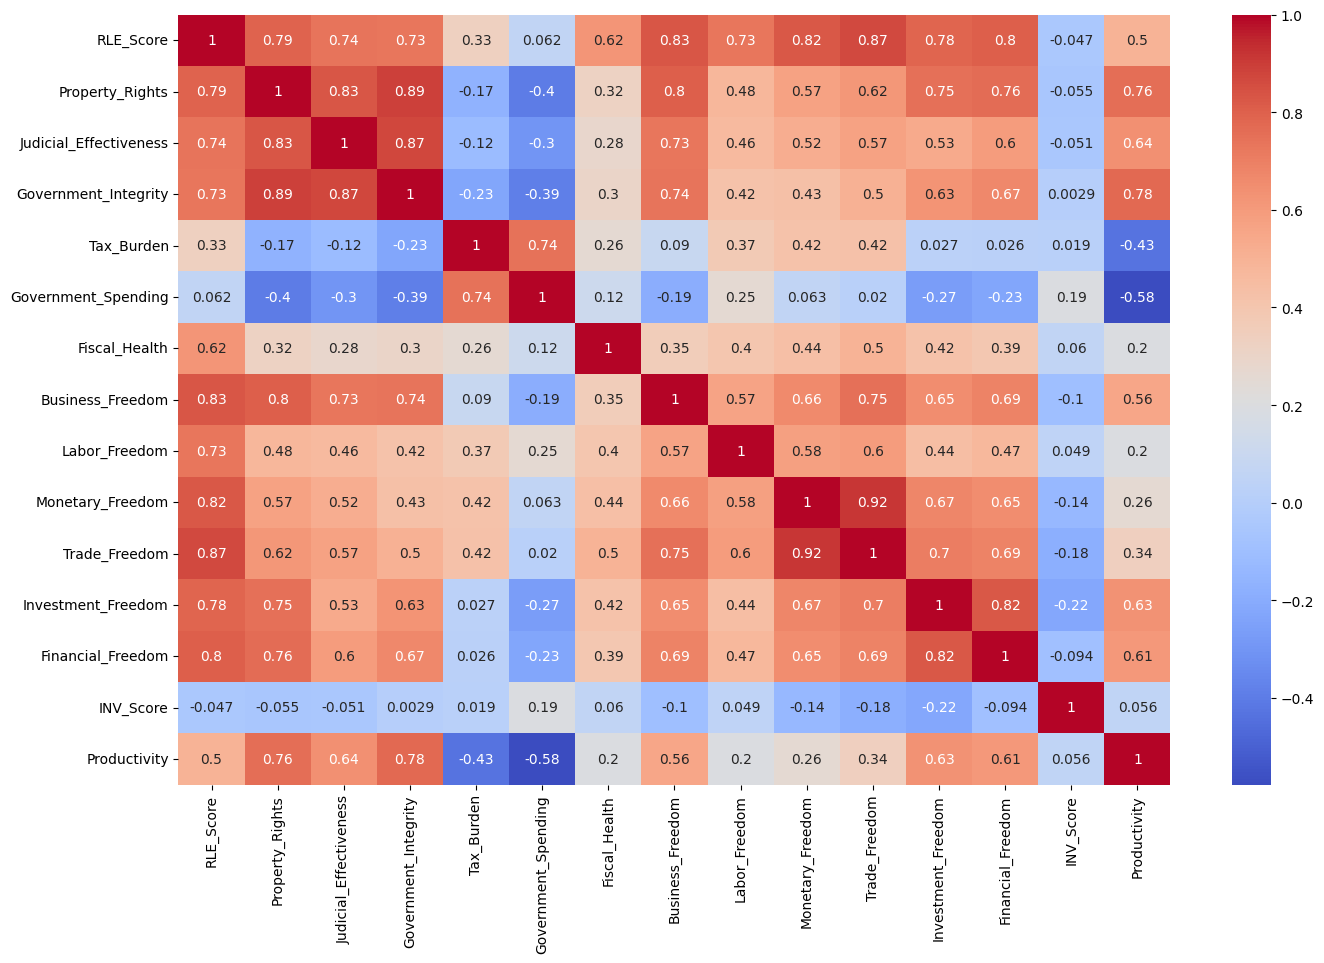

In [15]:
### Multicolinaridade por matriz de correlação

df_corr = df[['RLE_Score', 'Property_Rights', 'Judicial_Effectiveness', 'Government_Integrity', 'Tax_Burden', 'Government_Spending', 'Fiscal_Health', 'Business_Freedom', 'Labor_Freedom', 'Monetary_Freedom', 'Trade_Freedom', 'Investment_Freedom', 'Financial_Freedom', 'INV_Score', 'Productivity']]

corr = df_corr.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[[
    'RLE_Score'
    , 'Property_Rights'
    , 'Judicial_Effectiveness'
    , 'Government_Integrity'
    , 'Tax_Burden'
    , 'Government_Spending'
    , 'Fiscal_Health'
    , 'Business_Freedom'
    , 'Labor_Freedom'
    , 'Monetary_Freedom'
    , 'Trade_Freedom'
    , 'Investment_Freedom'
    , 'Financial_Freedom'
    , 'INV_Score'
    ]]

# Adicionando constante
X = sm.add_constant(X)

# Calculando o VIF para cada variável independente
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,89.045585
1,RLE_Score,159599.239374
2,Property_Rights,2453.440986
3,Judicial_Effectiveness,3053.351673
4,Government_Integrity,3761.798891
5,Tax_Burden,1777.237568
6,Government_Spending,4925.034933
7,Fiscal_Health,4980.086448
8,Business_Freedom,1925.598195
9,Labor_Freedom,1492.386157


$$
\text{Productivity} = \beta_0 + \beta_1 \times \text{Government\_Integrity} + \beta_2 \times \text{Government\_Spending} + \beta_3 \times \text{Investment\_Freedom} + \beta_4 \times \text{INV\_Score} + \epsilon
$$


In [40]:
X = df[['Government_Integrity', 'Government_Spending', 'Investment_Freedom', 'INV_Score']]

X = sm.add_constant(X)

y = df['Productivity']

# Ajustando o modelo
model_new = sm.OLS(y, X).fit()

# Sumário do modelo
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     147.8
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           1.27e-57
Time:                        09:11:24   Log-Likelihood:                -776.18
No. Observations:                 198   AIC:                             1562.
Df Residuals:                     193   BIC:                             1579.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.9144 

In [18]:
# Modelo antigo para comparação

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     47.08
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           5.28e-53
Time:                        09:01:51   Log-Likelihood:                -763.88
No. Observations:                 198   AIC:                             1558.
Df Residuals:                     183   BIC:                             1607.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

In [19]:
## Novo teste de VIF

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,feature,VIF
0,const,42.202229
1,Government_Integrity,1.923693
2,Government_Spending,1.235586
3,Investment_Freedom,1.803195
4,INV_Score,1.140861


## Ok, funcionou! E agora?

### Teste de Heterocedasticidade

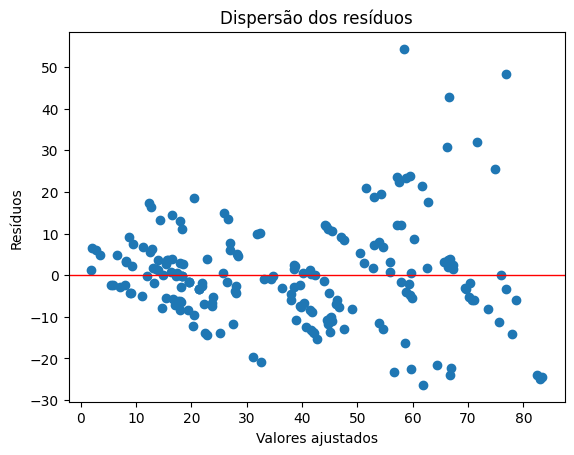

In [20]:
### Teste visual de heterocedasticidade

#### Visualizado a dispersão dos resíduos em gráfico de dispersão
residuals = model_new.resid
fitted = model_new.fittedvalues

plt.scatter(fitted, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='red', linewidth=1)
plt.title('Dispersão dos resíduos')
plt.show()


## O que é Heterocedasticidade?

Heterocedasticidade é um fenômeno em que a variância dos resíduos de um modelo de regressão não é constante em relação às variáveis independentes. Isso pode levar a estimativas de coeficientes imprecisas e testes de hipóteses inválidos. Em outras palavras, a variabilidade dos erros não segue uma distribuição normal.

### Temos um problema de heterocedasticidade, e agora?

1. **Transforme as variáveis**: Considere transformar as variáveis dependentes ou independentes para corrigir a heterocedasticidade.

2. **Use métodos robustos**: Utilize métodos de regressão robustos que são menos sensíveis à heterocedasticidade.

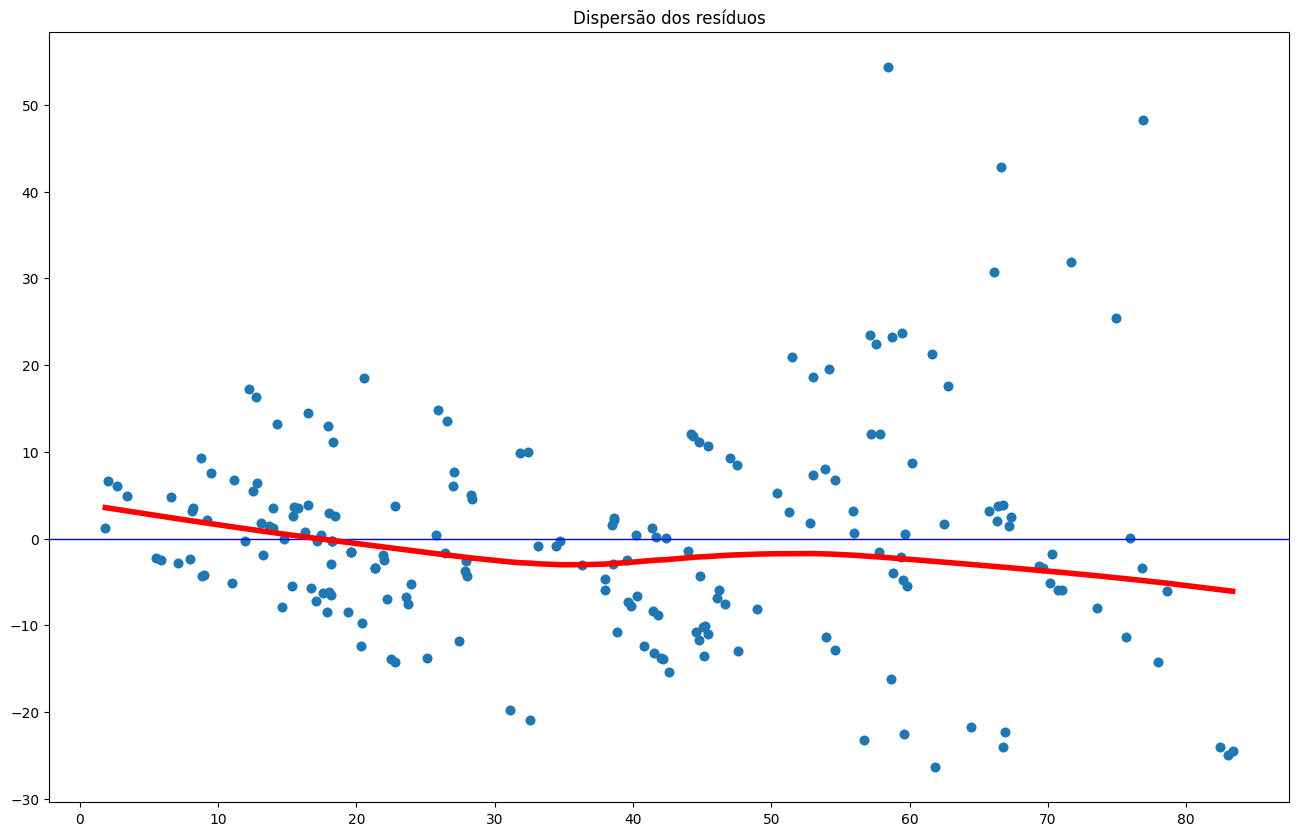

In [38]:
## Mostrando o gráfico de dispersão dos resíduos junto de uma linha de tendência para verificar a heterocedasticidade
## Se a linha de tendência for linear, então não há heterocedasticidade
## Se a linha de tendência for não-linear, ou seja, se a inclinação da linha de tendência for crescente ou decrescente, então há heterocedasticidade
## Se a linha de tendência for horizontal, então não há heterocedasticidade (vamos colocar uma linha horizontal para facilitar a comparação com a linha dos resíduos)

plt.figure(figsize=(16, 10))
plt.scatter(fitted, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='blue', linewidth=1)
plt.title('Dispersão dos resíduos')
sns.regplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'linewidth': 4})
plt.show()

In [44]:
## Usando robustez para corrigir a heterocedasticidade
model_robust = sm.OLS(y, X).fit(cov_type='HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     137.8
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.01e-55
Time:                        09:12:46   Log-Likelihood:                -776.18
No. Observations:                 198   AIC:                             1562.
Df Residuals:                     193   BIC:                             1579.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.9144 

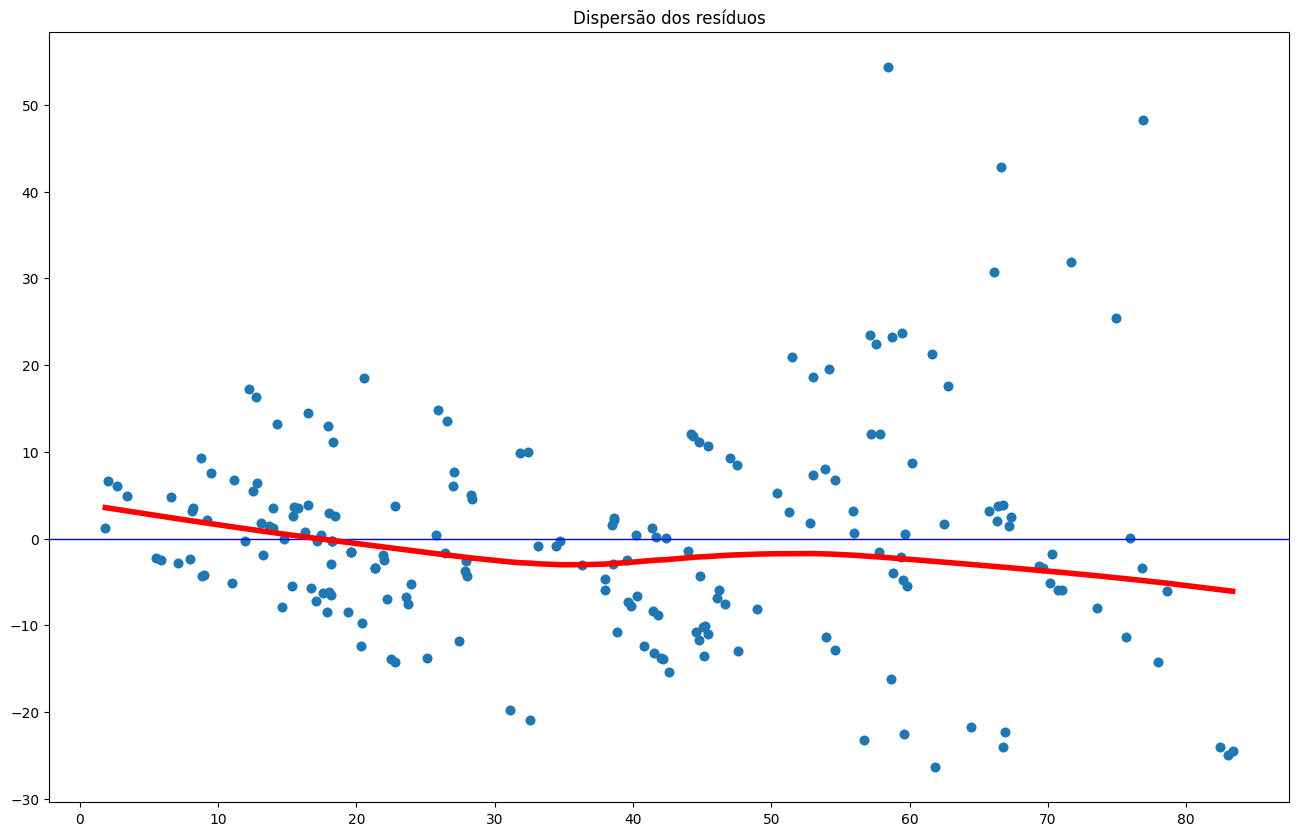

In [45]:
## Gráfico de dispersão dos resíduos com a linha de tendência em cov_type='HC3'
residuals_robust = model_robust.resid
fitted_robust = model_robust.fittedvalues

plt.figure(figsize=(16, 10))
plt.scatter(fitted_robust, residuals_robust)
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='blue', linewidth=1)
plt.title('Dispersão dos resíduos')
sns.regplot(x=fitted_robust, y=residuals_robust, lowess=True, line_kws={'color': 'red', 'linewidth': 4})
plt.show()